In [25]:
import numpy as np
from matplotlib import pyplot as plt
import math

- Open everything including internet and wolfram alpha(Please do use wolfram alpha for boring tedious task). It's 2020.
- Just no communication regarding exam. Making jokes with your friends is ok.
- The total score is 650. You only need to do 600 to get full score.

## Problem 1

### 1.1) (50)
Use bisection to solve the following equation

$\exp(x) = x^2$

make sure that the uncertainty is at most $10^{-5}$

In [46]:
def f(x):
    return np.exp(x) - x**2



def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) <= 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)


print(bisection(f, -2, 2, 1e-5))

-0.7034759521484375


### 1.2) (50)
Write down the Newtons' method update rule for solving

$\exp(x) = x^2$

In [48]:
def center_diff(f, x, h):
    return((f(x+h) - f(x-h))/ (2*h))

def newton(f, start, n):
    for z in range(n):
        x_next = start - (f(start)/ center_diff(f, start, 0.05))
        start = x_next
    return start

print(newton(f, 2, 100))

-0.7034674224983917


## Problem 2 (Wolfram-alpha is your friend)

### 1)  (50)

Find taylor series for around x=0 for 4 **non-zero** term.

$f(x) = (\sin(x))^2$

and use it to find $\sin(0.3)^2$

#### Answer 
Look in the pdf file

### 2) (50)

Given what you did above what is your uncertainty?




#### Answer 
Look in the pdf file

## Problem 3

### 3.1 (50)
Suppose that we want to perform linear regression of data points $x^{(i)}$ and $y^{(i)}$ for $i=1\ldots n$ with the function

$$
y = A \exp(x) + B \ln(x) + C
$$

Write down the normal equation(matrix that you need to solve to get A,B,C).


#### Answer 
Look in the pdf file

### 3.2 (50)

Find Legendre Polynomial which passes through all these points

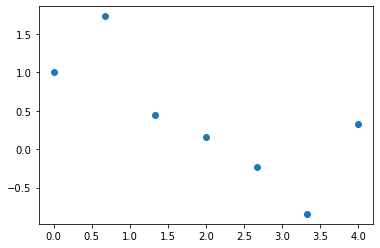

In [12]:
xs = np.linspace(0,4,7)
ys = np.sin(2*xs)**2 + np.cos(xs)
plt.plot(xs, ys, 'o')



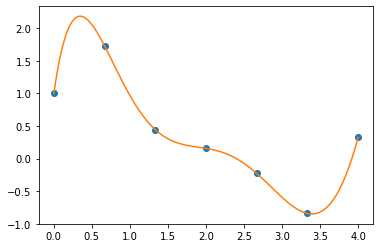

In [11]:
xs = np.linspace(0,4,7)
ys = np.sin(2*xs)**2 + np.cos(xs)
plt.plot(xs, ys, 'o')

def make_legendre(xs, ys):
    def legendre(x):
        summand = 0
        for ind,zz in enumerate(xs):
            xZeros = xs.copy()
            c = xZeros.pop(ind)
            num = 1
            den = 1
            for xx in xZeros:
                num *= ((x-xx)/(c-xx))
            summand += ys[ind]*num
        return summand
    return legendre

line = make_legendre(list(xs), list(ys))
ls = np.linspace(0,4, 100)
plt.plot(ls, line(ls))

## Problem 4

### 4.1 (50)

Use trapezoid rule to find the following integral. Make sure the uncertainty of your answer is less than $10^{-5}$

$$
     \int_0^2 2\sin(3x) \; \text{dx}
$$



In [29]:
def f(x):
    return 2*np.sin(3*x)

def second_der(f, x, h): ##second derivative
    return (f(x+h)- 2*f(x) + f(x-h)) / (h**2)


def trap_error_bound(f, a, b, n):
    p = abs(((b-a)**3 / (12*n**2)) * second_der(f, a, 0.0001))
    q = abs(((b-a)**3 / (12*n**2)) * second_der(f, b, 0.0001))
    if p > q:
        return p
    else:
        return q
    
def calc_n(f, a, b): ## Function to calculate how many iterations I need
    n = 1
    while trap_error_bound(f, a, b, n) > 1e-5:
        n += 1
    return n

def trapezoid(f, a, b, n):
    h = abs(b-a)/n
    res = 0
    for i in range(1,n):
        res += f(a+i*h)
    return (h/2)*(f(a) + f(b) + 2*res)

print("Answer:", trapezoid(f, 0, 2, calc_n(f, 0, 2)))

Answer: 0.026552905432945615


### 4.2 (50)

Plot **first** and **second** derivative of $\sin(x^2)$ for $x=0\ldots 5$.

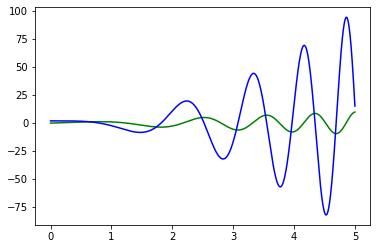

In [19]:
def f(x):
    return np.sin(x**2)

def first_der(f, x, h): 
    return ((f(x+h) - f(x-h))/ (2*h))

def second_der(f, x, h):
    return (f(x+h)- 2*f(x) + f(x-h)) / (h**2)

xs = np.linspace(0,5, 1000)
plt.plot(xs, first_der(f, xs, 0.001), "g")
plt.plot(xs, second_der(f, xs, 0.001), "b")

## Problem 5(100). Tracking Alien

In the year 3088, MUIC becomes humanity last fortress against alien attack. You are trying to figure out where the alien hideout exactly is from the alien partial footprint track. There are two types of aliens

1. **Red** alien which always travel in a straight line $y = A x + B$.

2. **Blue** alien which travel is a weird sinusodal line $y = C\sin(4x) +D x + E$.

Both alien species are originating from `exactly the same hideout` ($x_{hideout}, y_{hideout}$)
<img src="hideout.png" width="300px"/>

The track data is given below.

**Your task:**

Find the hideout.

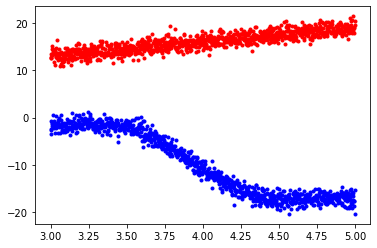

In [20]:
# DO NOT TOUCH THIS
np.random.seed(12345)
n_red = 1000
red_xs = np.linspace(3, 5,n_red)
red_ys = 3 * red_xs + 4. + np.random.randn(n_red)
plt.plot(red_xs, red_ys, '.r')

n_blue = 1000
blue_xs = np.linspace(3,5,n_blue)
blue_ys = 3*np.sin(blue_xs*4)-10 * blue_xs + 30. + np.random.randn(n_blue)
plt.plot(blue_xs, blue_ys, '.b')

In [28]:
from scipy.optimize import minimize

## finding functions
def cost_red(v):
    A, B = v
    return sum((A*red_xs + B - red_ys)**2)

def cost_blue(v):
    C, D, E = v
    return sum((C*np.sin(4*blue_xs) + D*blue_xs + E - blue_ys)**2)

A, B = minimize(cost_red, [4,3]).x
C, D, E = minimize(cost_blue, [4, 7, 20]).x

#print(A ,B, C, D, E)

## Finding intersection/hideout

def red_alien(x):
    return A*x + B

def blue_alien(x):
    return C*np.sin(4*x) + D*x + E

def hideout(x):
    return red_alien(x) - blue_alien(x)

def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)

x_hideout = bisection(hideout, -3, 3, 0.001)
y_hideout = blue_alien(x_hideout)
print("Hideout:", x_hideout, y_hideout)

Hideout: 2.15771484375 10.42908886669304


# Problem 6(150).

**Disclaimer**: This is an oversimplified model. It doesn't really represent the actual situation. After the term ends you will have enough knowledge to do a much better model.

This problem concerns the spread of COVID-19 virus. The basic model is the following

- At the beginning of day 1 there is excaly 1 patient.

- During each day, each active patient(see next one) will spread virus to $R$ more persons.
Ex: If $R=0.5$, and at the beginning of the day there are 10 patients. Then at the end of the day, $0.5 \times 10 = 5$ **more** people gets infected. (Keep all the precisions even if it's not the whole number)

- 14 days after infection. The patient either die off(more below) or heal and will no longer spread the virus to others. Ex: This means that the first patient will no longer spread the virus at the end of day 14(during day 14 he still spread the virus). In particular, number of newly infected patient during day 50 is $\sum_{i=36..49} \text{newly_infected}_i$

- 14 days after infection. A proportion $d$ of patient who are already infected for 14 days will die off and $(1-d)$ will be healed at the end of the day. 
In particular, if during day 12 there are $n_{12}$ more people who get infected during the day. At the end of day 26, $d \times n_{12}$ will die off.

**Your Task:**

At the **beginning** of Day 81 (80 days have passed), there are 80,000 total infected patient(including spreading, dead and healed) and 1000 dead . 
1. Find $R$.
2. Then, find $d$.


**Hint**

To get last 5 element of the list you can do ``x[-5:]``

For you to check your answer.

If $R=0.2$ and $d=0.1$, the number of newly infected patient on each day is as follow:
```
day 0 - newly infected(during) 1 - dead(at the end) 0
day 1 - newly infected(during) 0.2 - dead(at the end) 0
day 2 - newly infected(during) 0.24 - dead(at the end) 0
day 3 - newly infected(during) 0.288 - dead(at the end) 0
day 4 - newly infected(during) 0.3456 - dead(at the end) 0
day 5 - newly infected(during) 0.41472 - dead(at the end) 0
day 6 - newly infected(during) 0.497664 - dead(at the end) 0
day 7 - newly infected(during) 0.5971968 - dead(at the end) 0
day 8 - newly infected(during) 0.71663616 - dead(at the end) 0
day 9 - newly infected(during) 0.8599633919999999 - dead(at the end) 0
day 10 - newly infected(during) 1.0319560704 - dead(at the end) 0
day 11 - newly infected(during) 1.2383472844799999 - dead(at the end) 0
day 12 - newly infected(during) 1.486016741376 - dead(at the end) 0
day 13 - newly infected(during) 1.7832200896512 - dead(at the end) 0
day 14 - newly infected(during) 2.13986410758144 - dead(at the end) 0.1
day 15 - newly infected(during) 2.3678369290977277 - dead(at the end) 0.020000000000000004
day 16 - newly infected(during) 2.8014043149172734 - dead(at the end) 0.024
day 17 - newly infected(during) 3.3136851779007284 - dead(at the end) 0.0288
day 18 - newly infected(during) 3.9188222134808743 - dead(at the end) 0.03456
day 19 - newly infected(during) 4.633466656177048 - dead(at the end) 0.041472
day 20 - newly infected(during) 5.477215987412459 - dead(at the end) 0.0497664
day 21 - newly infected(during) 6.47312638489495 - dead(at the end) 0.05971968
day 22 - newly infected(during) 7.648312301873941 - dead(at the end) 0.071663616
day 23 - newly infected(during) 9.034647530248728 - dead(at the end) 0.0859963392
day 24 - newly infected(during) 10.669584357898474 - dead(at the end) 0.10319560704
day 25 - newly infected(during) 12.597110015398169 - dead(at the end) 0.12383472844799999
day 26 - newly infected(during) 14.868862561581802 - dead(at the end) 0.1486016741376
day 27 - newly infected(during) 17.545431725622965 - dead(at the end) 0.17832200896512002
day 28 - newly infected(during) 20.697874052817316 - dead(at the end) 0.213986410758144
day 29 - newly infected(during) 24.409476041864494 - dead(at the end) 0.23678369290977277
day 30 - newly infected(during) 28.81780386441784 - dead(at the end) 0.28014043149172735
day 31 - newly infected(during) 34.02108377431796 - dead(at the end) 0.33136851779007287
day 32 - newly infected(during) 40.162563493601404 - dead(at the end) 0.3918822213480875
day 33 - newly infected(during) 47.41131174962551 - dead(at the end) 0.4633466656177048
day 34 - newly infected(during) 55.9668807683152 - dead(at the end) 0.5477215987412459
day 35 - newly infected(during) 66.06481372449575 - dead(at the end) 0.647312638489495
day 36 - newly infected(during) 77.98315119241592 - dead(at the end) 0.7648312301873941
day 37 - newly infected(during) 92.05011897052431 - dead(at the end) 0.9034647530248728
day 38 - newly infected(during) 108.65321325857943 - dead(at the end) 1.0669584357898474
day 39 - newly infected(during) 128.2499390387156 - dead(at the end) 1.259711001539817
day 40 - newly infected(during) 151.3805048433791 - dead(at the end) 1.4868862561581802
day 41 - newly infected(during) 178.68283329973858 - dead(at the end) 1.7545431725622966
day 42 - newly infected(during) 210.9103136145617 - dead(at the end) 2.0697874052817316
day 43 - newly infected(during) 248.95280152691058 - dead(at the end) 2.4409476041864497
day 44 - newly infected(during) 293.8614666239198 - dead(at the end) 2.8817803864417844
day 45 - newly infected(during) 346.8701991758202 - dead(at the end) 3.402108377431796
day 46 - newly infected(during) 409.4400222561206 - dead(at the end) 4.01625634936014
day 47 - newly infected(during) 483.2955140086245 - dead(at the end) 4.741131174962551
day 48 - newly infected(during) 570.4723544604243 - dead(at the end) 5.59668807683152
day 49 - newly infected(during) 673.3734491988462 - dead(at the end) 6.606481372449576
day 50 - newly infected(during) 794.8351762937164 - dead(at the end) 7.798315119241592
day 51 - newly infected(during) 938.2055813139764 - dead(at the end) 9.205011897052431
day 52 - newly infected(during) 1107.4366737826665 - dead(at the end) 10.865321325857943
day 53 - newly infected(during) 1307.193365887484 - dead(at the end) 12.824993903871562
day 54 - newly infected(during) 1542.9820512572378 - dead(at the end) 15.13805048433791
day 55 - newly infected(during) 1821.3023605400097 - dead(at the end) 17.86828332997386
day 56 - newly infected(during) 2149.826265988064 - dead(at the end) 21.09103136145617
day 57 - newly infected(during) 2537.6094564627642 - dead(at the end) 24.895280152691058
day 58 - newly infected(during) 2995.3407874499353 - dead(at the end) 29.38614666239198
day 59 - newly infected(during) 3535.636651615138 - dead(at the end) 34.68701991758202
day 60 - newly infected(during) 4173.389942103002 - dead(at the end) 40.94400222561206
day 61 - newly infected(during) 4926.179926072378 - dead(at the end) 48.32955140086245
day 62 - newly infected(during) 5814.756808485129 - dead(at the end) 57.047235446042436
day 63 - newly infected(during) 6863.613699290069 - dead(at the end) 67.33734491988461
day 64 - newly infected(during) 8101.661749308315 - dead(at the end) 79.48351762937165
day 65 - newly infected(during) 9563.027063911235 - dead(at the end) 93.82055813139765
day 66 - newly infected(during) 11287.991360430688 - dead(at the end) 110.74366737826665
day 67 - newly infected(during) 13324.102297760292 - dead(at the end) 130.7193365887484
day 68 - newly infected(during) 15727.484084134852 - dead(at the end) 154.2982051257238
day 69 - newly infected(during) 18564.384490710374 - dead(at the end) 182.130236054001
day 70 - newly infected(during) 21913.00091674445 - dead(at the end) 214.9826265988064
day 71 - newly infected(during) 25865.635846895726 - dead(at the end) 253.76094564627644
day 72 - newly infected(during) 30531.24112498232 - dead(at the end) 299.53407874499356
day 73 - newly infected(during) 36038.4211924888 - dead(at the end) 353.5636651615138
day 74 - newly infected(during) 42538.97810066353 - dead(at the end) 417.3389942103002
day 75 - newly infected(during) 50212.09573237563 - dead(at the end) 492.61799260723785
day 76 - newly infected(during) 59269.278893636285 - dead(at the end) 581.475680848513
day 77 - newly infected(during) 69960.18331066651 - dead(at the end) 686.361369929007
day 78 - newly infected(during) 82579.49723294181 - dead(at the end) 810.1661749308315
day 79 - newly infected(during) 97475.06432966852 - dead(at the end) 956.3027063911236
day 80 - newly infected(during) 115057.47178281995 - dead(at the end) 1128.7991360430688
```



**Bonus: 0.0000000000001 point just for fun**

You can think about this model as if we makes no effort in controlling the virus. No quarantine, no awareness, no reserch on the cure. You will find that with this model and the number you found the virus will take over the world.

In real life, a lot of effort are made to control the virus, you can think about it as $R$ is decreasing over time.

To see why this is important:

Given this model, there is a critical value of $R$ that is if $R$ is greater than the critical value the virus will take over the world. Find/Approximate $R_\text{critical}$.



In [108]:
### I know the solution is not correct at all. I didn't understand how I can simulate people who become 
### not spreading (heal or die) the virus. (You will see, that my values are correct until the 14th day.)

def virus(R, day):
    active = 1
    new = 1
    inactive = 0
    news = [1]
    for i in range(0, day):
        #print("day", i, "newly infected:", new)
        new = active*R
        news.append(new)
        active += new
        if (i%13) == 0 and i != 0: ## Here I tried to mention the healed or died persons
            for i in range(0, 13):
                active -= (1/(i+1))*news[i]
            news = []        
    return active 

def total_on80(R):
    return virus(R, 80) - 80000

def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)
    
print("R:", bisection(total_on80, 0, 1, 0.001))
#virus(0.2, 20)


R: 0.166015625
